## The objective of this homework was to treat the data of all the reported earthquakes from the years 1904 to 2017 with a magnitude greater than 5 units.

In [2]:
# Importing libraires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A. Series

#### a) Retrieving the series contained in the Earthquake.dat

In [3]:
file ='EARTHQUAKE.dat'
columns = ["YEAR", "MONTH", "DAY", "HOUR", "MAGNITUDE"]
df = pd.read_csv(file, delim_whitespace = True, header = None, names = columns)

In [4]:
df

,YEAR,MONTH,DAY,HOUR,MAGNITUDE
0,1904.0,4.0,4.0,0.418456,6.84
1,1904.0,4.0,4.0,0.434732,7.02
2,1904.0,6.0,25.0,0.615036,7.50
3,1904.0,6.0,25.0,0.875448,7.70
4,1904.0,12.0,20.0,0.239125,7.29
...,...,...,...,...,...
41705,2017.0,12.0,28.0,0.722469,5.75
41706,2017.0,12.0,28.0,0.903408,5.54
41707,2017.0,12.0,29.0,0.889500,5.63
41708,2017.0,12.0,29.0,0.997160,5.73


#### b) Retrieving the date from the corresponding informative columns

In [5]:
df['YEAR'] = df['YEAR'].astype('int')
df['MONTH'] = df['MONTH'].astype('int')
df['DAY'] = df['DAY'].astype('int')
df['HOUR'] = (df['HOUR']*24).astype('float')
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY','HOUR']])

In [6]:
df['DATE']

0       1904-04-04 10:02:34.560384
1       1904-04-04 10:26:00.880224
2       1904-06-25 14:45:39.139776
3       1904-06-25 21:00:38.720160
4       1904-12-20 05:44:20.439744
                   ...            
41705   2017-12-28 17:20:21.289632
41706   2017-12-28 21:40:54.409728
41707   2017-12-29 21:20:52.789632
41708   2017-12-29 23:55:54.640416
41709   2017-12-30 20:53:25.100160
Name: DATE, Length: 41710, dtype: datetime64[ns]

#### c) Retrieving the data collected throughout the years 1910 and 2017 of the earthquakes with amplitude >= 6

In [7]:
df_reduced = df[(df.MAGNITUDE >= 6) & ((df.YEAR >= 1910) & (df.YEAR <= 2017))].reset_index()

In [8]:
df_reduced

,index,YEAR,MONTH,DAY,HOUR,MAGNITUDE,DATE
0,199,1910,1,1,11.032980,6.83,1910-01-01 11:01:58.729728
1,200,1910,1,8,14.823505,6.59,1910-01-08 14:49:24.619584
2,201,1910,1,22,8.807005,6.98,1910-01-22 08:48:25.219584
3,202,1910,1,23,18.823167,6.53,1910-01-23 18:49:23.399904
4,204,1910,4,12,0.373556,8.10,1910-04-12 00:22:24.800016
...,...,...,...,...,...,...,...
12023,41685,2017,12,9,15.240450,6.06,2017-12-09 15:14:25.620000
12024,41689,2017,12,12,8.721675,6.00,2017-12-12 08:43:18.029568
12025,41690,2017,12,12,21.692181,6.04,2017-12-12 21:41:31.850304
12026,41692,2017,12,13,18.062386,6.50,2017-12-13 18:03:44.589888


#### d) Creating a new matrix containing the data retrieved in points b) and magnitude

In [9]:
matrixB = df_reduced[['DATE','MAGNITUDE']]

print("Dimension of the matrix B is", matrixB.shape)

Dimension of the matrix B is (12028, 2)


In [10]:
print("First three rows:\n")
matrixB.head(3)

First three rows:



,DATE,MAGNITUDE
0,1910-01-01 11:01:58.729728,6.83
1,1910-01-08 14:49:24.619584,6.59
2,1910-01-22 08:48:25.219584,6.98


#### e) Making a graph of the resulting time series (1910 - 2017)

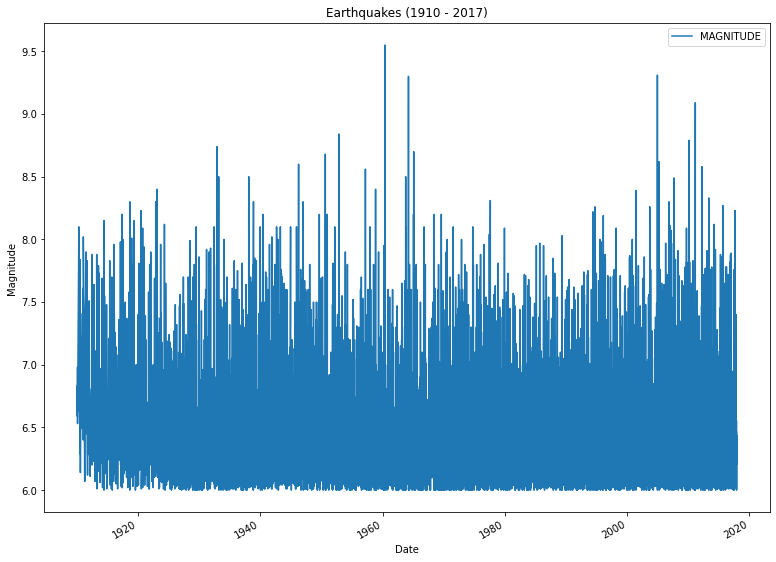

In [11]:
matrixB.plot(x ='DATE', y ='MAGNITUDE', xlabel ='Date',ylabel ='Magnitude',title ="Earthquakes (1910 - 2017)", figsize=(13,10))
plt.show()

## B. Categorization

#### a) Counting the number of earthquakes categorized by magnitude intervals

The earthquakes were split into 4 different categories by magnitude:
1. Between 6 and 6.99 (6 <= x < 7)
2. 7 and 7.99 (7 <= x < 8)
3. 8 and 8.99 (8 <= x < 9)
4. and greater than 9 (9 <= x)

In [12]:
magnitude = ['6 <= x < 7','7 <= x < 8','8 <= x < 9','9 <= x']
bins = [6, 7, 8, 9, 10]
categorized_by_magnitude = pd.cut(matrixB.MAGNITUDE, bins, labels =
magnitude, right=False)

print(categorized_by_magnitude.value_counts())

6 <= x < 7    10787
7 <= x < 8     1157
8 <= x < 9       80
9 <= x            4
Name: MAGNITUDE, dtype: int64


## Mean and Meadian

## A. Mean

#### a) Calculating the mean value and its first, second, and third standard deviations

In [13]:
mean = matrixB.MAGNITUDE.mean()

std1 = matrixB.MAGNITUDE.std()
std2 =2*std1
std3 =3*std1
t_mean_std = pd.Series({'mean': mean,'std1': std1,'std2':std2,'std3':std3})

print(t_mean_std)

mean    6.432369
std1    0.420982
std2    0.841963
std3    1.262945
dtype: float64


#### b) Plotting matrixB regarding time, its mean and its mean +/-std1, mean +/-std2, mean +/-std3

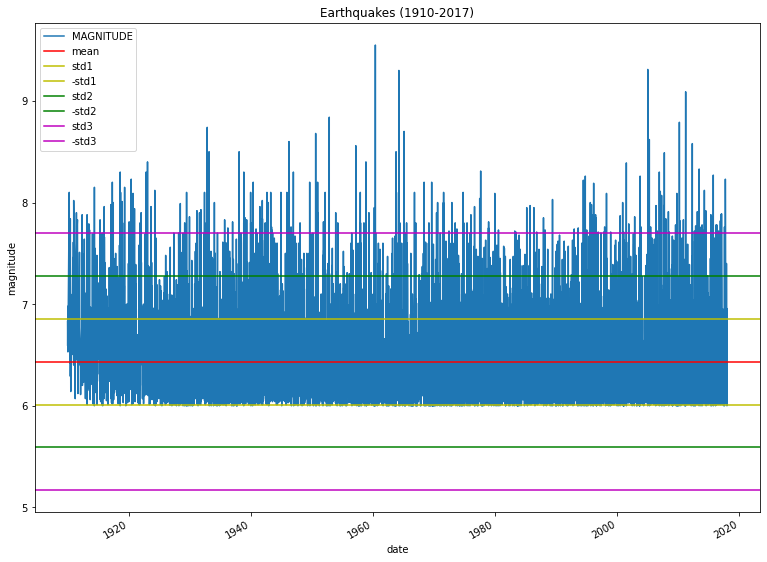

In [14]:
matrixB.plot(x ='DATE', y ='MAGNITUDE', xlabel ='date', ylabel ='magnitude', title ="Earthquakes (1910-2017)", figsize=(13,10))

plt.axhline(mean, label ='mean', c ='r')
plt.axhline(mean+std1, label ='std1',  c ='y')
plt.axhline(mean-std1, label ='-std1', c ='y')
plt.axhline(mean+std2, label ='std2', c ='g')
plt.axhline(mean-std2, label ='-std2', c ='g')
plt.axhline(mean+std3, label ='std3', c ='m')
plt.axhline(mean-std3, label ='-std3', c ='m')

plt.legend()
plt.show()

#### c) Finding the percentage of values of magnitudes which are below std1 (< std1), between std1 and std2 (std1 <= x <= std2), above std3 (x > std3)

In [15]:
below_std1 = matrixB[(matrixB.MAGNITUDE > mean - std1) & (matrixB.MAGNITUDE < mean + std1)]

between_std1_std2 = matrixB[(matrixB.MAGNITUDE >= mean+ std1) & (matrixB.MAGNITUDE <= mean +std2)]

above_std3 = matrixB[(matrixB.MAGNITUDE > mean + std3)]

numbers = pd.Series({'below std1': below_std1.shape[0],'between std1 and std2': between_std1_std2.shape[0],
                     'above std3': above_std3.shape[0]})

percentages = pd.Series({'% std1': numbers[0] / matrixB.shape[0] * 100,'% std2': numbers[1] / matrixB.shape[0] * 100,
                         '% std3': numbers[2] / matrixB.shape[0] * 100})

print(percentages)

% std1    80.961091
% std2     8.829398
% std3     2.045228
dtype: float64
